# Ceilometer Quicklooks

## Code to Generate Plots

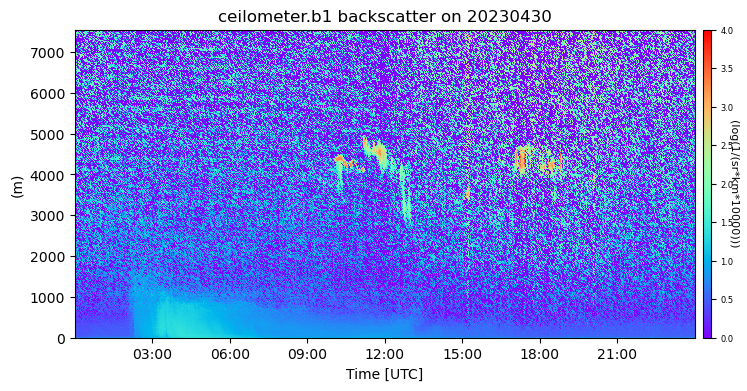

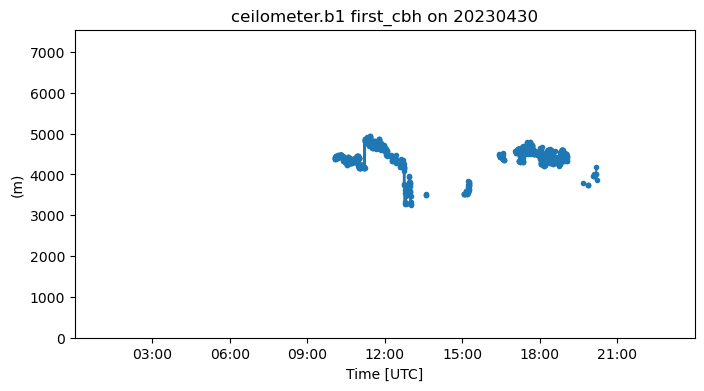

In [1]:
import act
import glob
import matplotlib.pyplot as plt
import matplotlib

files = glob.glob('../../data/ceilometer/sgp*')

ds = act.io.read_arm_netcdf(files)

# apply range correction
ds = act.corrections.correct_ceil(ds)

ds.attrs['datastream'] = 'ceilometer.b1'

# variables=['p_pol', 'x_pol', 'linear_depol_ratio']

variables = ['backscatter', 'first_cbh']

for variable in variables:
    display = act.plotting.TimeSeriesDisplay(ds, figsize=(8,4))
    if variable == 'backscatter':
        display.plot(variable,
                     cmap='rainbow',
                     vmin=0,
                     vmax=4,
                     y_rng=(0, ds.range.max().values))
    else:
        display.plot(variable,
                     cmap='rainbow',
                     y_rng=(0, ds.range.max().values))

    plt.show()
    plt.close()